4. Haga un modelo de clasificación, use la variable categórica que hizo con el precio de las
casas (barata, media y cara) como variable respuesta

✅ Dataset cargado con éxito.

🔹 Distribución de la variable de respuesta:
Precio_Categorizado
Media     490
Barata    487
Cara      483
Name: count, dtype: int64

🔹 Columnas categóricas: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
🔹 Columnas numéricas: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFin

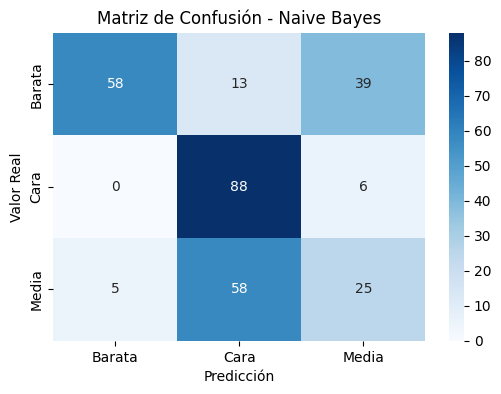

In [9]:
# 🔹 Importar librerías necesarias
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 1. Cargar el dataset
file_path = "../dataset/train.csv"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"⚠️ No se encontró el archivo: {file_path}.")

df = pd.read_csv(file_path)
print("✅ Dataset cargado con éxito.")

# 🔹 2. Crear variable categórica 'Precio_Categorizado' si no existe
if "Precio_Categorizado" not in df.columns:
    df["Precio_Categorizado"] = pd.qcut(df["SalePrice"], q=3, labels=["Barata", "Media", "Cara"])

print("\n🔹 Distribución de la variable de respuesta:")
print(df["Precio_Categorizado"].value_counts())

# 🔹 3. Identificar variables categóricas y numéricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=['number']).drop(columns=["SalePrice"]).columns.tolist()

print("\n🔹 Columnas categóricas:", categorical_cols)
print("🔹 Columnas numéricas:", numeric_cols)

# 🔹 4. Convertir variables categóricas a numéricas con One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_categorical = encoder.fit_transform(df[categorical_cols])
X_categorical = pd.DataFrame(X_categorical)

# 🔹 5. Normalización de variables numéricas
scaler = StandardScaler()
X_numeric = scaler.fit_transform(df[numeric_cols])
X_numeric = pd.DataFrame(X_numeric)

# 🔹 6. Crear la matriz final de características
X_final = pd.concat([X_numeric, X_categorical], axis=1)

# 🔹 7. Manejo de valores nulos antes de entrenar el modelo
X_final.fillna(X_final.median(numeric_only=True), inplace=True)  # Reemplazar NaN en numéricas
X_final.fillna("None", inplace=True)  # Reemplazar NaN en categóricas

# 🔹 8. Convertir la variable de respuesta a valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["Precio_Categorizado"])

# 🔹 9. División de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# 🔹 10. Verificar si todavía hay NaN en los datos
if X_train.isnull().sum().sum() > 0 or X_test.isnull().sum().sum() > 0:
    raise ValueError("❌ Todavía hay NaN en los datos después de la limpieza.")

# 🔹 11. Entrenar modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 🔹 12. Hacer predicciones
y_pred = nb_model.predict(X_test)

# 🔹 13. Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"\n📊 Evaluación del Modelo de Clasificación Naive Bayes:\nExactitud: {accuracy:.4f}")
print("\n🔹 Matriz de Confusión:\n", conf_matrix)
print("\n🔹 Reporte de Clasificación:\n", class_report)

# 🔹 14. Graficar Matriz de Confusión
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()


El modelo de clasificación Naive Bayes logró una exactitud del **58.56%**, lo que indica un rendimiento moderado con margen de mejora. La matriz de confusión muestra que la categoría **"Media"** fue la más difícil de clasificar correctamente, con muchas predicciones erróneas hacia **"Cara"**, mientras que la clase **"Barata"** tuvo alta precisión (**92%**), pero un recall bajo (**53%**), lo que sugiere que muchas casas baratas fueron clasificadas incorrectamente. En contraste, la clase **"Cara"** mostró un recall elevado (**94%**), pero con menor precisión (**55%**), reflejando un sesgo del modelo hacia esta categoría. Esto sugiere que Naive Bayes no es el modelo más adecuado para este conjunto de datos, ya que asume independencia de características, lo que no se cumple en los precios de las casas. Para mejorar el desempeño, se podría probar con modelos más robustos como **Árboles de Decisión o Random Forest**, junto con una mejor selección y transformación de características.